In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import itertools

In [2]:
csv_files = glob.glob('*.{}'.format('csv'))
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

C:\Users\nurvo\AppData\Local\Temp\ipykernel_19448\843997799.py:2: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)


In [3]:
df_new = df.dropna(subset=['Object of search'])

In [4]:
df_new = df_new.loc[df_new['Object of search'] == 'Stolen goods']
df_new

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
299744,Person search,2018-03-01T00:20:00+00:00,0.0,NaN,NaN,NaN,Male,NaN,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN
299763,Person search,2018-03-01T02:24:00+00:00,0.0,NaN,NaN,NaN,Male,NaN,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN
299764,Person and Vehicle search,2018-03-01T02:30:00+00:00,0.0,NaN,NaN,NaN,Male,NaN,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN
299807,Person search,2018-03-01T12:10:00+00:00,0.0,NaN,NaN,NaN,Male,NaN,Other ethnic group - Any other ethnic group,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Community resolution,NaN,NaN
299811,Person search,2018-03-01T12:35:00+00:00,0.0,NaN,NaN,NaN,Female,NaN,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414908,Person search,2023-03-31T20:35:00+00:00,0.0,NaN,NaN,NaN,Male,10-17,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN
1414926,Person search,2023-03-31T21:49:00+00:00,0.0,NaN,51.564025,-0.007665,Male,over 34,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN
1414930,Person search,2023-03-31T22:00:00+00:00,0.0,NaN,51.659592,-0.048052,Male,over 34,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN
1414951,Person search,2023-03-31T22:24:00+00:00,0.0,NaN,51.381118,-0.090590,Male,NaN,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN


In [5]:
# 130674

In [6]:
print("percentage male:", len(df_new[df_new['Gender'] == 'Male']) / len(df_new) * 100)
print("percentage female:", 100 - (len(df_new[df_new['Gender'] == 'Male']) / len(df_new) * 100))

percentage male: 87.05939972756632
percentage female: 12.940600272433684


In [7]:
df_age = df_new['Age range'].value_counts()
df_ethnicity = df_new['Officer-defined ethnicity'].value_counts()

df_age

over 34     31444
18-24       29555
10-17       27630
25-34       26691
under 10       34
Name: Age range, dtype: int64

In [8]:
df_ethnicity

White    66955
Black    41682
Asian    12136
Other     5927
Name: Officer-defined ethnicity, dtype: int64

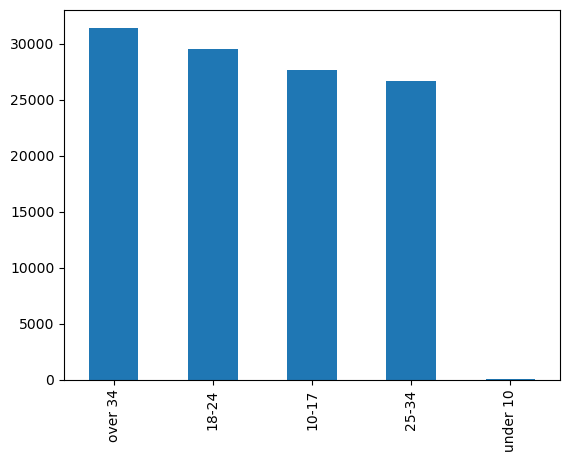

In [9]:
ax = df_age.plot.bar()

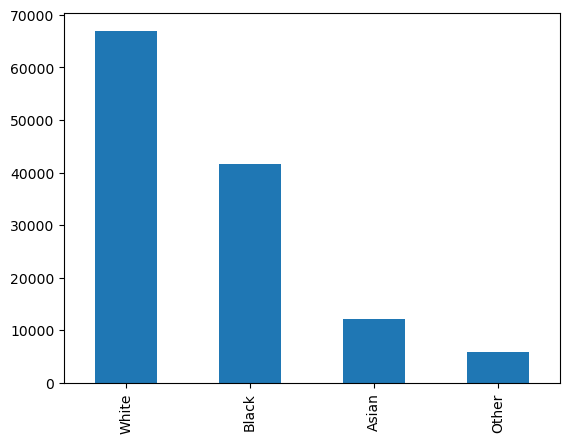

In [10]:
ax2 = df_ethnicity.plot.bar()

In [11]:
age_list = df_age.index.tolist()
ethnicity_list = df_ethnicity.index.tolist()

In [12]:
combinations = list(itertools.product(age_list, ethnicity_list))

combinations[0]
per_combi = {}

for i in range(len(combinations)):
    per_combi[combinations[i]] = len(df_new[(df_new['Age range'] == combinations[i][0]) & 
                                            (df_new['Officer-defined ethnicity'] == combinations[i][1])])

In [13]:
sorted_per_combi = sorted(per_combi.items(), key=lambda x:x[1], reverse=True)
sorted_per_combi 

[(('over 34', 'White'), 20145),
 (('25-34', 'White'), 16526),
 (('18-24', 'White'), 13836),
 (('10-17', 'Black'), 12886),
 (('10-17', 'White'), 11341),
 (('18-24', 'Black'), 10170),
 (('over 34', 'Black'), 7230),
 (('25-34', 'Black'), 5870),
 (('18-24', 'Asian'), 3470),
 (('over 34', 'Asian'), 2859),
 (('25-34', 'Asian'), 2615),
 (('10-17', 'Asian'), 2054),
 (('18-24', 'Other'), 1798),
 (('25-34', 'Other'), 1426),
 (('10-17', 'Other'), 1085),
 (('over 34', 'Other'), 975),
 (('under 10', 'White'), 16),
 (('under 10', 'Black'), 10),
 (('under 10', 'Asian'), 5),
 (('under 10', 'Other'), 2)]